In [890]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn import ensemble, linear_model, tree
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# all

In [939]:
all_data = ''
for file in os.listdir('../data/profiling/all'):
    if file.startswith('part-'):
        all_data += open('../data/profiling/all/' + file, 'r').read()
        
all_data = all_data[:len(all_data) - 1]

In [940]:
weather = []
crimes = []

all_data = all_data.split('\n')
for data in all_data:
    data = data.split(',')
    # linear
    #weather.append([int(data[0]), int(data[1]), int(data[2]), int(data[3]), int(data[4])])
    
    # quadratic
    weather.append([int(data[0]), int(data[0])**2, int(data[1]), int(data[2]), int(data[3]), int(data[4]), int(data[4])**2])
    
    # only temp and humidity
    #weather.append([int(data[0]), int(data[0])**2, int(data[4]), int(data[4])**2])

    crimes.append(int(data[5]))
    

p = np.random.permutation(len(weather))
weather = np.array(weather)[p]
crimes = np.array(crimes)[p]

In [941]:
train_x = weather[:-int(0.2*len(weather))]
train_y = crimes[:-int(0.2*len(crimes))]

In [942]:
test_x = weather[-int(0.2*len(weather)):]
test_y = crimes[-int(0.2*len(crimes)):]

## model

### lr

In [928]:
lr = linear_model.LinearRegression()

In [929]:
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [930]:
preds = lr.predict(test_x)
print('mse:', mean_squared_error(test_y, preds))
print('r2:', r2_score(test_y, preds))

mse: 2980915.3541210745
r2: 0.295696869986948


In [931]:
X = np.array([48, 48*48, 0, 0, 0, 92, 92*92]).reshape(1, 7)

lr.predict(X)

array([2272.60083408])

### decision tree

In [943]:
dt = tree.DecisionTreeRegressor(max_depth=9)

In [944]:
dt.fit(train_x, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [946]:
dt.score(test_x, test_y)

0.4155670233259825

### random forest

In [947]:
rf = ensemble.RandomForestRegressor(max_depth=10)

In [948]:
rf.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [949]:
rf.score(test_x, test_y)

0.4662968480697928

# temperature

In [912]:
temp_data = ''
for file in os.listdir('../data/profiling/temperature'):
    if file.startswith('part-'):
        temp_data += open('../data/profiling/temperature/' + file, 'r').read()
        
temp_data = temp_data[:len(temp_data) - 1]

In [913]:
temps = []
crimes = []

temp_data = temp_data.split('\n')
for data in temp_data:
    data = data.split(',')
    temps.append(int(data[0]))
    crimes.append(int(data[1]))
    
# quadratic

temps_orig = copy.deepcopy(temps)

for i in range(len(temps)):
    temps[i] = [temps[i], temps[i]**2]
    
p = np.random.permutation(len(temps))
temps_orig = np.array(temps_orig)[p]
temps = np.array(temps)[p]
crimes = np.array(crimes)[p]

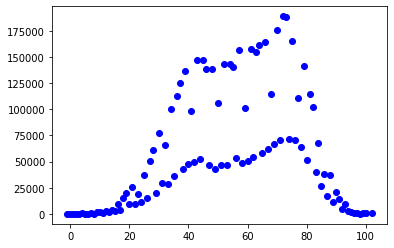

In [914]:
plt.plot(temps_orig, crimes, 'bo')

## model

### linear

In [820]:
train_x = temps[:-int(0.2*len(temps))].reshape(-1, 1)
train_y = crimes[:-int(0.2*len(crimes))]

In [821]:
test_x = temps[-int(0.2*len(temps)):].reshape(-1, 1)
test_y = crimes[-int(0.2*len(crimes)):]

### quadratic

In [915]:
train_x = temps[:-int(0.2*len(temps))]
train_y = crimes[:-int(0.2*len(crimes))]

In [916]:
test_x = temps[-int(0.2*len(temps)):]
test_y = crimes[-int(0.2*len(crimes)):]

In [917]:
lr = linear_model.LinearRegression()

In [918]:
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [919]:
preds = lr.predict(test_x)
r2_score(test_y, preds)

0.5708874250369762

In [920]:
X = np.array([48, 48*48]).reshape(1, 2)
lr.predict(X)

array([97049.61499585])

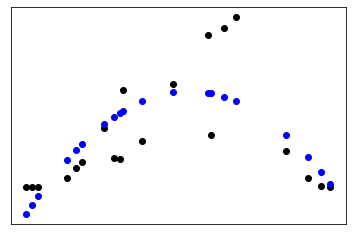

In [922]:
test_x = temps_orig[-int(0.2*len(temps_orig)):].reshape(-1, 1)
test_y = crimes[-int(0.2*len(crimes)):]

plt.scatter(test_x, test_y,  color='black')
plt.scatter(test_x, preds, color='blue')

plt.xticks(())
plt.yticks(())

plt.show()

In [365]:
X2 = sm.add_constant(train_x)
est = sm.OLS(train_y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     39.75
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           1.03e-12
Time:                        18:14:21   Log-Likelihood:                -994.83
No. Observations:                  83   AIC:                             1996.
Df Residuals:                      80   BIC:                             2003.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.527e+04   1.23e+04     -3.669      0.0

# temperature bins

In [385]:
temp_bins = []
for t in temps:
    new_t = (t + 5) // 10 * 10
    if new_t not in temp_bins:
        temp_bins.append(new_t)

temp_bins.sort()
    
crime_bins = [0 for t in temp_bins]
for i in range(len(crimes)):
    crime_bins[(temps[i] + 5) // 10] += crimes[i]

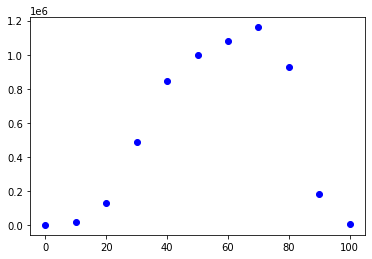

In [387]:
plt.plot(temp_bins, crime_bins, 'bo')

## model

### linear

In [402]:
train_x = np.array(temp_bins[:-int(0.2*len(temp_bins))]).reshape(-1, 1)
train_y = crime_bins[:-int(0.2*len(crime_bins))]

In [403]:
test_x = np.array(temp_bins[-int(0.2*len(temp_bins)):]).reshape(-1, 1)
test_y = crime_bins[-int(0.2*len(crime_bins)):]

### quadratic

In [410]:
train_x = temp_bins[:-int(0.2*len(temp_bins))]
for i in range(len(train_x)):
    train_x[i] = [train_x[i], train_x[i]**2]
train_x = np.array(train_x)

train_y = crime_bins[:-int(0.2*len(crime_bins))]

In [411]:
test_x = temp_bins[-int(0.2*len(temp_bins)):]
for i in range(len(test_x)):
    test_x[i] = [test_x[i], test_x[i]**2]
test_x = np.array(test_x)

test_y = crime_bins[-int(0.2*len(crime_bins)):]

In [413]:
lr = linear_model.LinearRegression()

In [414]:
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [415]:
preds = lr.predict(test_x)
r2_score(test_y, preds)

-116.29084414797498

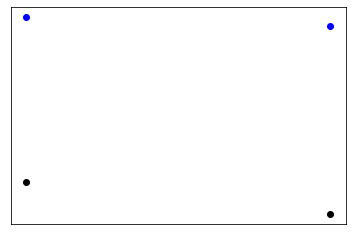

In [416]:
test_x = np.array(temp_bins[-int(0.2*len(temp_bins)):]).reshape(-1, 1)
test_y = crime_bins[-int(0.2*len(crime_bins)):]

plt.scatter(test_x, test_y,  color='black')
plt.scatter(test_x, preds, color='blue')

plt.xticks(())
plt.yticks(())

plt.show()

In [417]:
X2 = sm.add_constant(train_x)
est = sm.OLS(train_y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     29.27
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           0.000803
Time:                        18:22:11   Log-Likelihood:                -119.18
No. Observations:                   9   AIC:                             244.4
Df Residuals:                       6   BIC:                             245.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.883e+05   1.36e+05     -1.387      0.2

/Users/vaibgadodia/.virtualenvs/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


# humidity

In [191]:
humid_data = ''
for file in os.listdir('../data/humidity'):
    if file.startswith('part-'):
        humid_data += open('../data/humidity/' + file, 'r').read()
        
humid_data = humid_data[:len(humid_data) - 1]

In [192]:
hpercentages = []
crimes = []

humid_data = humid_data.split('\n')
for data in humid_data:
    data = data.split(',')
    hpercentages.append(int(data[0]))
    crimes.append(int(data[1]))

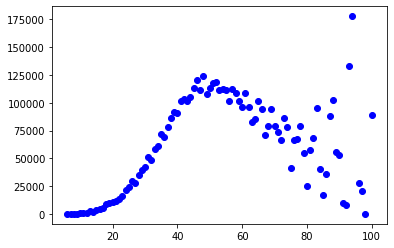

In [193]:
plt.plot(hpercentages, crimes, 'bo')

## model

### linear

In [194]:
train_x = np.array(hpercentages[:-int(0.2*len(hpercentages))]).reshape(-1, 1)
train_y = crimes[:-int(0.2*len(crimes))]

In [195]:
test_x = np.array(hpercentages[-int(0.2*len(hpercentages)):]).reshape(-1, 1)
test_y = crimes[-int(0.2*len(crimes)):]

### quadratic

In [201]:
train_x = hpercentages[:-int(0.2*len(hpercentages))]
for i in range(len(train_x)):
    train_x[i] = [train_x[i], train_x[i]**2]
train_x = np.array(train_x)

train_y = crimes[:-int(0.2*len(crimes))]

In [202]:
test_x = hpercentages[-int(0.2*len(hpercentages)):]
for i in range(len(test_x)):
    test_x[i] = [test_x[i], test_x[i]**2]
test_x = np.array(test_x)

test_y = crimes[-int(0.2*len(crimes)):]

In [204]:
lr = linear_model.LinearRegression()

In [205]:
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [206]:
preds = lr.predict(test_x)
r2_score(test_y, preds)

0.6753009643519624

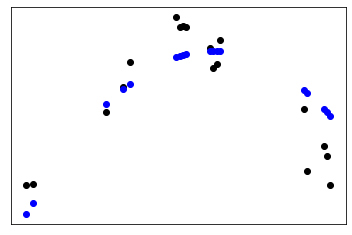

In [207]:
plt.scatter(test_x, test_y,  color='black')
plt.scatter(test_x, preds, color='blue')

plt.xticks(())
plt.yticks(())

plt.show()

# rain

In [209]:
rain_data = ''
for file in os.listdir('../data/rain'):
    if file.startswith('part-'):
        rain_data += open('../data/rain/' + file, 'r').read()
        
rain_data = rain_data[:len(rain_data) - 1]

In [210]:
rain = []
crimes = []

rain_data = rain_data.split('\n')
for data in rain_data:
    data = data.split(',')
    rain.append(int(data[0]))
    crimes.append(int(data[1]))

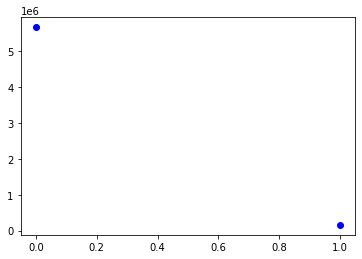

In [56]:
plt.plot(rain, crimes, 'bo')

# snow

In [60]:
snow_data = ''
for file in os.listdir('../data/snow'):
    if file.startswith('part-'):
        snow_data += open('../data/snow/' + file, 'r').read()
        
snow_data = snow_data[:len(snow_data) - 1]

In [61]:
snow = []
crimes = []

snow_data = snow_data.split('\n')
for data in snow_data:
    data = data.split(',')
    snow.append(int(data[0]))
    crimes.append(int(data[1]))

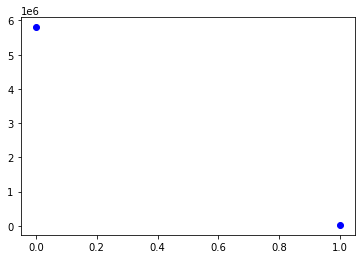

In [62]:
plt.plot(snow, crimes, 'bo')

# fog

In [64]:
fog_data = ''
for file in os.listdir('../data/fog'):
    if file.startswith('part-'):
        fog_data += open('../data/fog/' + file, 'r').read()
        
fog_data = fog_data[:len(fog_data) - 1]

In [65]:
fog = []
crimes = []

fog_data = fog_data.split('\n')
for data in fog_data:
    data = data.split(',')
    fog.append(int(data[0]))
    crimes.append(int(data[1]))

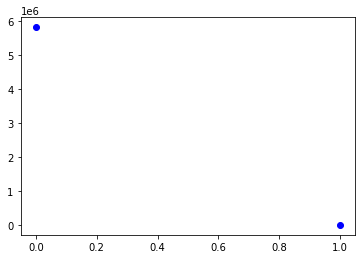

In [66]:
plt.plot(fog, crimes, 'bo')

# year, month, day, minutes, type, temp, rain, snow, fog, humidity

In [1152]:
comp_data = ''
for file in os.listdir('../data/profiling/comp'):
    if file.startswith('part-'):
        comp_data += open('../data/profiling/comp/' + file, 'r').read()
        
comp_data = comp_data[:len(comp_data) - 1]

In [1153]:
yr = 2017
rape = 45
burg = 3
assault = 9

In [1154]:
weather = []
crimes = []

comp_data = comp_data.split('\n')
for data in comp_data:
    data = data.split(',')

    if int(data[4]) != assault:
        continue
        
    # quadratic
    #weather.append([int(data[5]), int(data[5])**2, int(data[6]), int(data[7]), int(data[8]), int(data[9]), int(data[9])**2])
    weather.append([int(data[5])])
    
    crimes.append(int(data[10]))

In [1155]:
# isolate ind. features -- optional

w_bins = []
for w in weather:
    w = w[0]
    if w not in w_bins:
        w_bins.append(w)

w_bins.sort()
    
c_bins = [0 for w in w_bins]
for i in range(len(crimes)):
    c_bins[w_bins.index(weather[i][0])] += crimes[i]
    
# quadratic
w_bins_orig = copy.deepcopy(w_bins)

#for i in range(len(w_bins)):
#    w_bins[i] = [w_bins[i], w_bins[i]**2]

p = np.random.permutation(len(w_bins))
w_bins_orig = np.array(w_bins_orig)[p]
w_bins = np.array(w_bins)[p]
c_bins = np.array(c_bins)[p]

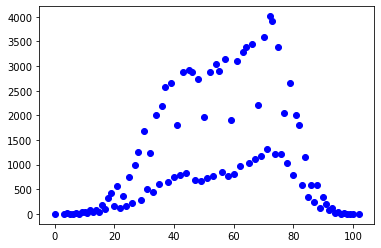

In [1156]:
plt.plot(w_bins, c_bins, 'bo')

In [1157]:
train_x = w_bins[:-int(0.2*len(w_bins))].reshape(-1, 1)
train_y = c_bins[:-int(0.2*len(c_bins))]

In [1158]:
test_x = w_bins[-int(0.2*len(w_bins)):].reshape(-1, 1)
test_y = c_bins[-int(0.2*len(c_bins)):]

## model

### lr

In [1159]:
lr = linear_model.LinearRegression()

In [1160]:
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1161]:
preds = lr.predict(test_x)
print('mse:', mean_squared_error(test_y, preds))
print('r2:', r2_score(test_y, preds))

mse: 1395808.627675713
r2: -0.025088771557409073


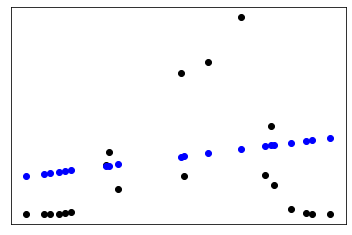

In [1162]:
plt.scatter(w_bins_orig[-int(0.2*len(w_bins)):], test_y,  color='black')
plt.scatter(w_bins_orig[-int(0.2*len(w_bins)):], preds, color='blue')

plt.xticks(())
plt.yticks(())

plt.show()

### decision tree

In [1163]:
dt = tree.DecisionTreeRegressor(max_depth=3)

In [1164]:
dt.fit(train_x, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [1165]:
dt.score(test_x, test_y)

0.45914886448453607

### random forest

In [1166]:
rf = ensemble.RandomForestRegressor(max_depth=2)

In [1167]:
rf.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [1168]:
rf.score(test_x, test_y)

0.5600924404712233